<a href="https://colab.research.google.com/github/saadali112/CS-351L---AI-Lab-GitHub-Repository_2022512/blob/main/2022512_CS351L_Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the number of exams: 6
Using Degree Heuristic: Prioritizing exams with the most conflicts (highest degree).


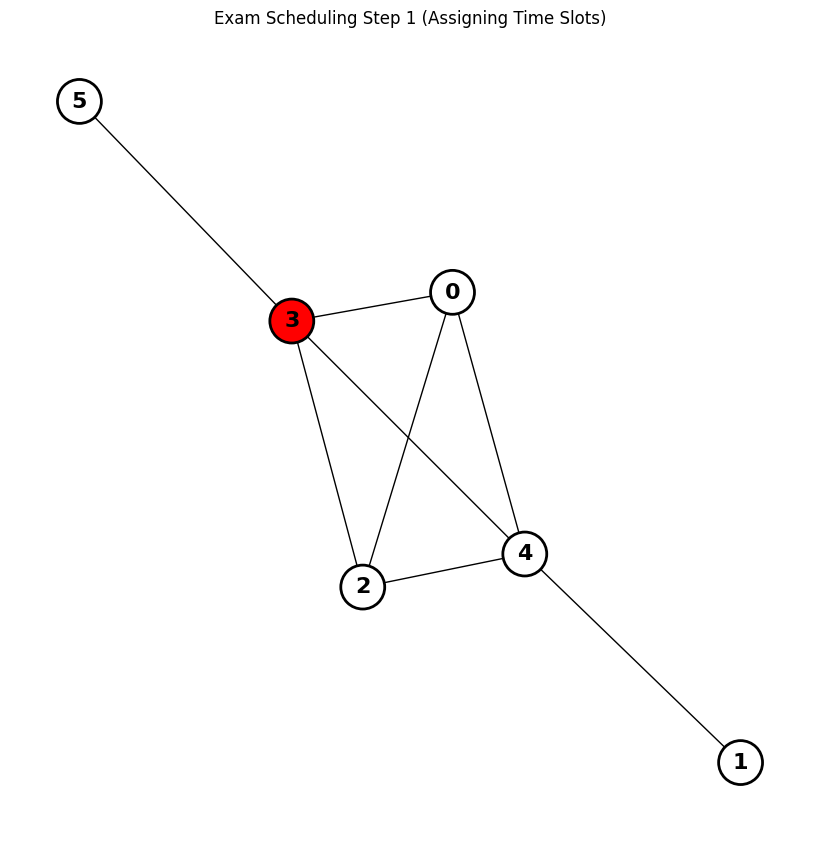

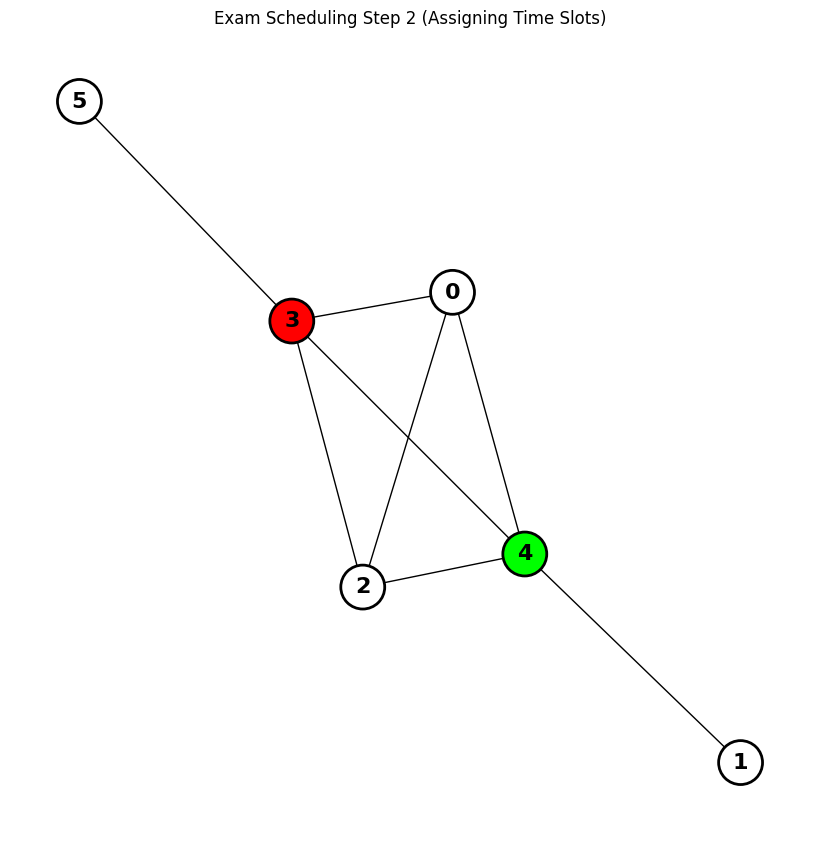

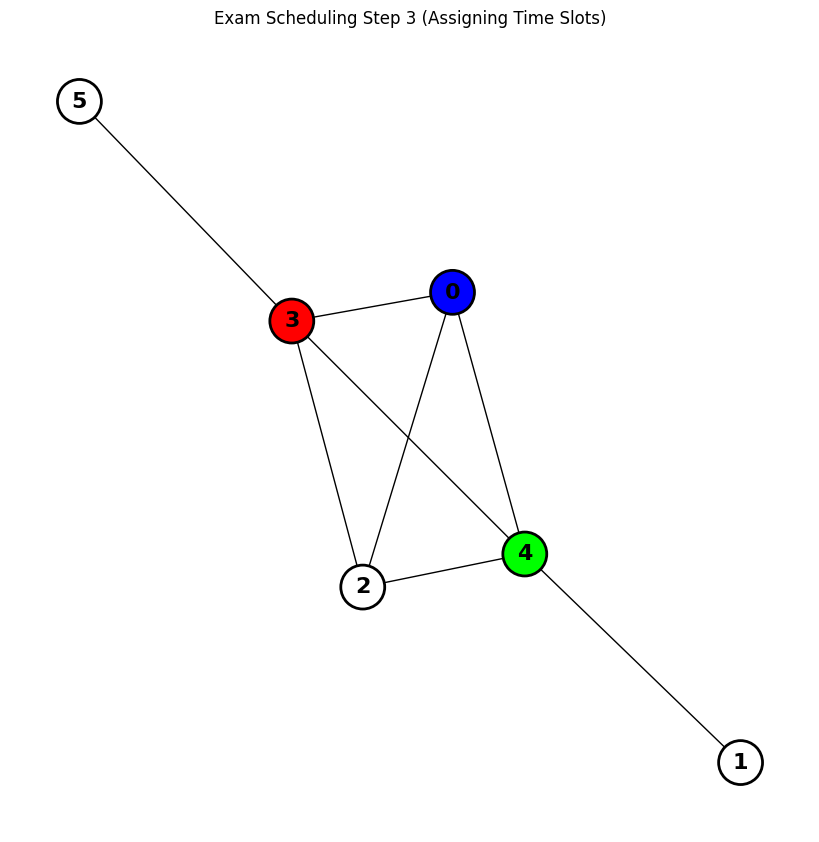

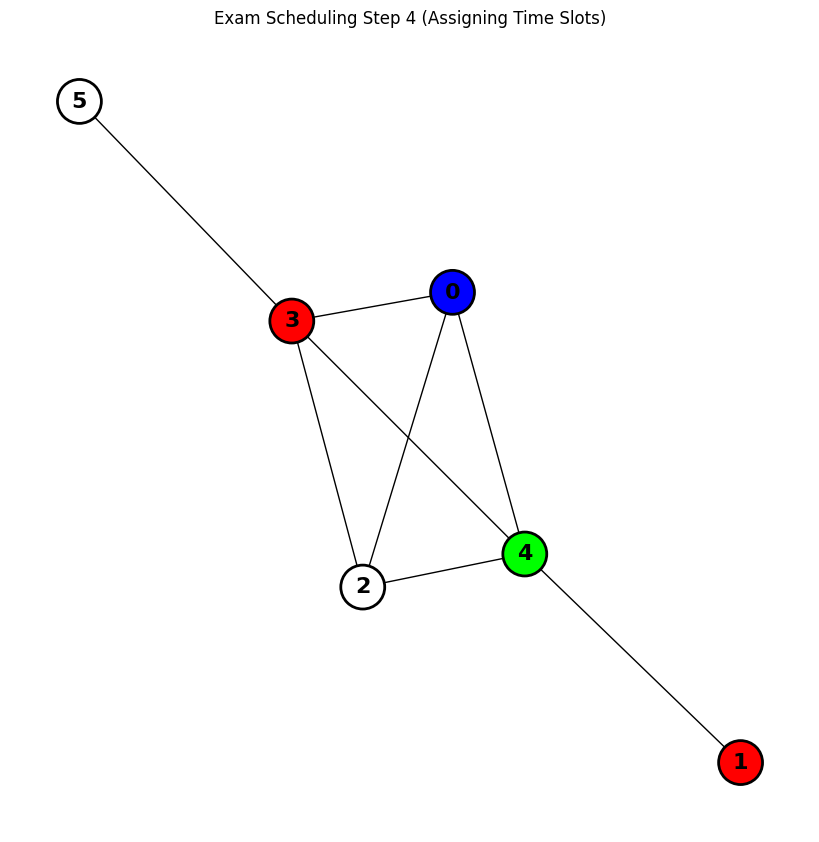

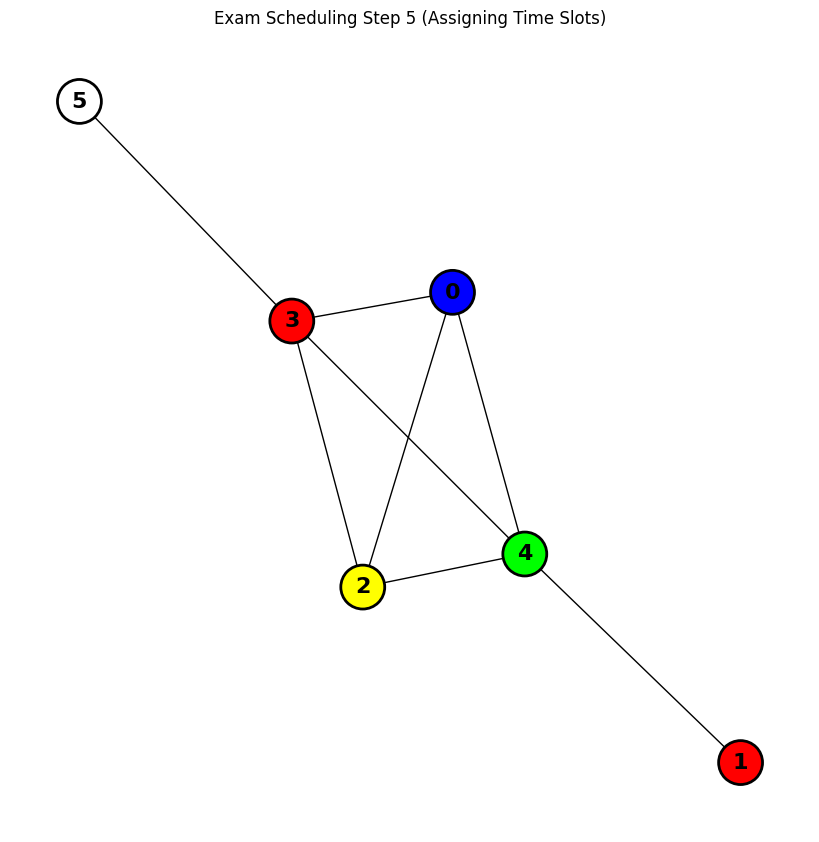

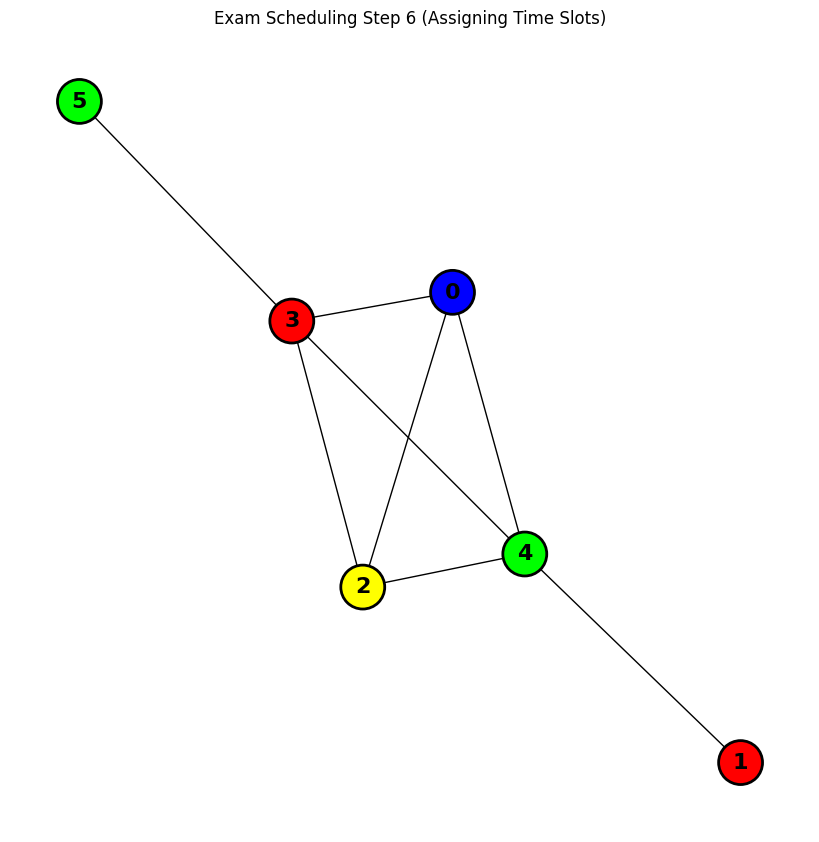

Final Assignment of Time Slots for Exams: {3: '#FF0000', 4: '#00FF00', 0: '#0000FF', 1: '#FF0000', 2: '#FFFF00', 5: '#00FF00'}


In [2]:
# Exam Scheduling Scenario Using Degree Heuristic
# ===================================================
# Scenario:
# This script simulates a university exam scheduling problem where we need to assign time slots
# to exams without causing conflicts. The conflicts arise when two or more exams share common
# students, meaning these exams cannot be scheduled in the same time slot.
# The goal is to assign time slots (represented by colors) to each exam (represented by nodes in the graph)
# such that no two conflicting exams are scheduled at the same time.

# Explanation of Modifications:
# 1. Graph Representation:
#    - The graph represents the exam scheduling problem where each node represents an exam,
#      and edges between nodes represent conflicts (shared students).
#    - A random graph is generated where edges indicate exams that cannot share the same time slot.
# 2. Heuristic Choice (Degree Heuristic):
#    - We have used the **Degree Heuristic**, which prioritizes the scheduling of exams with the highest degree
#      (i.e., exams that have the most conflicts or neighbors).
#    - This heuristic is chosen because it helps resolve more complex scheduling problems first, reducing the likelihood
#      of conflicts later in the process.
#    - The function `select_unassigned_node_Degree` chooses the next exam to schedule based on the number of conflicts it has.
# 3. Visualization:
#    - At each step, the current state of the scheduling (graph coloring) is visualized.
#    - Each color represents a different time slot, and we can track the process step by step as exams are assigned time slots.
# 4. Backtracking with Degree Heuristic:
#    - The backtracking algorithm has been adapted to use the Degree Heuristic to select the next node (exam) to color.
#    - If a valid time slot is found for the current exam, it is assigned, and the algorithm proceeds to the next exam.
#    - If no valid time slot is found, the algorithm backtracks and tries a different time slot for the previous exam.
# ===================================================

import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Automatically generate a set of colors based on the number of nodes (time slots)
def generate_colors(num_nodes):
    color_list = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#800080', '#FFA500', '#00FF7F']
    return color_list[:min(num_nodes, len(color_list))]

# Step 2: Function to create a random graph representing exam conflicts
# In this graph, each node represents an exam, and edges represent conflicts (common students between exams)
def create_exam_conflict_graph(num_exams):
    G = nx.gnp_random_graph(num_exams, 0.4, seed=42)  # Random graph generation
    return G

# Step 3: Visualize the graph coloring step by step (exams assigned to time slots)
def visualize_graph(G, assignment, step, pos):
    plt.figure(figsize=(8, 8))  # Increase the figure size for better clarity

    # Default color for uncolored nodes is white
    node_colors = ['#ffffff'] * len(G.nodes)
    # Assign colors to the nodes based on the current assignment
    for node, color in assignment.items():
        node_colors[node] = color

    # Draw the graph with current color assignments
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=1000, font_size=16, font_color='black', edge_color='black',
            linewidths=2, node_shape='o', edgecolors='black')

    plt.title(f"Exam Scheduling Step {step} (Assigning Time Slots)")
    plt.show()

# Step 4: Function to check if a time slot assignment is valid
def is_valid_color(G, node, color, assignment):
    # Check all neighboring nodes (conflicting exams) to ensure no conflict (no neighbor has the same color/time slot)
    for neighbor in G.neighbors(node):
        if neighbor in assignment and assignment[neighbor] == color:
            return False  # Conflict found
    return True  # No conflict

# Step 6: Degree Heuristic (choose the exam with the most conflicts)
# This heuristic ensures we prioritize exams that are more difficult to schedule (i.e., have the most conflicts).
def select_unassigned_node_Degree(G, assignment):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    # Select the exam with the most conflicts (highest number of neighbors)
    degree_node = max(unassigned_nodes, key=lambda node: len([n for n in G.neighbors(node) if n not in assignment]))
    return degree_node

# Step 7: Backtracking with Degree Heuristic
def backtracking_with_heuristics(G, assignment, step, colors, pos):
    if len(assignment) == len(G.nodes):
        return assignment  # All exams are scheduled (all nodes colored)

    # Apply the Degree Heuristic to select the exam with the most conflicts
    node = select_unassigned_node_Degree(G, assignment)

    for color in colors:
        if is_valid_color(G, node, color, assignment):
            assignment[node] = color  # Assign the time slot
            visualize_graph(G, assignment, step, pos)  # Visualize the current step
            result = backtracking_with_heuristics(G, assignment, step+1, colors, pos)
            if result:
                return result  # Return if a valid scheduling is found
            del assignment[node]  # Backtrack if no valid solution is found

    return None  # No solution found, backtrack

# Step 8: Function to let user choose number of exams and generate random conflict graph
def schedule_exams_with_user_input():
    # Ask the user for the number of exams
    num_exams = int(input("Enter the number of exams: "))

    # Generate colors (time slots) based on the number of exams
    colors = generate_colors(num_exams)

    # Create a random graph representing exam conflicts
    G = create_exam_conflict_graph(num_exams)

    # Applying Degree Heuristic for scheduling exams
    print("Using Degree Heuristic: Prioritizing exams with the most conflicts (highest degree).")

    pos = nx.spring_layout(G, seed=42)  # Generate the position for the graph layout

    # Perform backtracking with the Degree Heuristic to schedule the exams
    final_assignment = backtracking_with_heuristics(G, {}, 1, colors, pos)
    print("Final Assignment of Time Slots for Exams:", final_assignment)

# Step 9: Run the exam scheduling with user input
schedule_exams_with_user_input()
